In [79]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [80]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [81]:
NUM_CLASSES = 8

# Dataset reading

In [82]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [83]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [85]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [86]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_8 (Dropout)         (None, 42)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                860       
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 8)                 88        
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [88]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [89]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/18 [>.............................] - ETA: 7s - loss: 2.1497 - accuracy: 0.1953
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 1s 9ms/step - loss: 2.0585 - accuracy: 0.1692 - val_loss: 1.9559 - val_accuracy: 0.3819
Epoch 2/1000
 1/18 [>.............................] - ETA: 0s - loss: 2.0295 - accuracy: 0.2109
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 4ms/step - loss: 1.9529 - accuracy: 0.2242 - val_loss: 1.8556 - val_accuracy: 0.5288
Epoch 3/1000
 1/18 [>.............................] - ETA: 0s - loss: 1.8603 - accuracy: 0.2422
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 6ms/step - loss: 1.8810 - accuracy: 0.2815 - val_loss: 1.7508 - val_accuracy: 0.5797


C:\Users\Shiza Salman\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/1000
 1/18 [>.............................] - ETA: 0s - loss: 1.8160 - accuracy: 0.3203
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 8ms/step - loss: 1.7936 - accuracy: 0.3448 - val_loss: 1.6408 - val_accuracy: 0.6223
Epoch 5/1000
18/18 [==============================] - ETA: 0s - loss: 1.7172 - accuracy: 0.3952
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 7ms/step - loss: 1.7172 - accuracy: 0.3952 - val_loss: 1.5437 - val_accuracy: 0.6250
Epoch 6/1000
 1/18 [>.............................] - ETA: 0s - loss: 1.6257 - accuracy: 0.4219
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 7ms/step - loss: 1.6389 - accuracy: 0.4310 - val_loss: 1.4460 - val_accuracy: 0.6772
Epoch 7/1000
 1/18 [>.............................] - ETA: 0s - loss: 1.5600 - accuracy: 0.5312
E

In [90]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 [==============================] - 0s 1ms/step - loss: 0.1653 - accuracy: 0.9478


In [91]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [92]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 31ms/step
[9.9831596e-02 9.7528525e-02 1.1224304e-03 6.9246137e-01 3.5584922e-06
 9.1812410e-04 9.8621408e-03 9.8272271e-02]
3


# Confusion matrix

23/23 [==============================] - 0s 710us/step


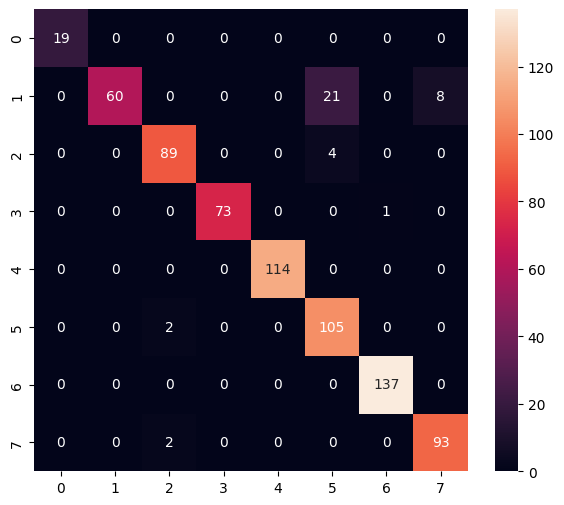

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.67      0.81        89
           2       0.96      0.96      0.96        93
           3       1.00      0.99      0.99        74
           4       1.00      1.00      1.00       114
           5       0.81      0.98      0.89       107
           6       0.99      1.00      1.00       137
           7       0.92      0.98      0.95        95

    accuracy                           0.95       728
   macro avg       0.96      0.95      0.95       728
weighted avg       0.95      0.95      0.95       728



In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [94]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Shiza Salman\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [95]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\SHIZAS~1\AppData\Local\Temp\tmpicnx3op0\assets


INFO:tensorflow:Assets written to: C:\Users\SHIZAS~1\AppData\Local\Temp\tmpicnx3op0\assets


6784

# Inference test

In [96]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [97]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [98]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [99]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [100]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9831685e-02 9.7528577e-02 1.1224326e-03 6.9246113e-01 3.5584978e-06
 9.1812556e-04 9.8621557e-03 9.8272316e-02]
3
